# Day 1 Enron Text mining exercise

1. Set up the console for rich printing
2. Define file path
3. Read CSV file into DataFrame
4.1 Define search terms
4.2 Use string operations to filter rows
5. Create a rich table for filtered emails


Filtered Emails (first few rows):

╭──────────────────────┬──────────────────────┬──────────────────────┬──────────────────────┬─────────────────────╮
│ Message-ID           │ From                 │ To                   │ Date                 │ Content             │
├──────────────────────┼──────────────────────┼──────────────────────┼──────────────────────┼─────────────────────┤
│ <6336501.10758411543 │ ('sarah.palmer@enro… │ ('sarah.palmer@enron │ 2002-02-01 14:53:35  │ joint venture enron │
│ 11.JavaMail.evans@th │                      │ .com')               │                      │ meeting belies      │
│ yme>                 │                      │                      │                      │ officers claims th  │
│                      │                      │                      │                      │ e dark minutes show │
│                      │                      │                      │                      │ hearing novel       │
│                      │                      │                      │                      │ partnerships        │
│                      │                      │                      │                      │ inflated ea rnings  │
│                      │                      │                      │                      │ present lay         │
│                      │                      │                      │                      │ skilling fastow     │
│                      │                      │                      │                      │ wall street journal │
│                      │                      │                      │                      │ ex enron ceo agrees │
│                      │                      │                      │                      │ testify pane...     │
╰──────────────────────┴──────────────────────┴──────────────────────┴──────────────────────┴─────────────────────╯

6. display and word cloud generation as intended


Flagged Emails Count:

┏━━━━━━┳━━━━━━━┓
┃ Flag ┃ Count ┃
┡━━━━━━╇━━━━━━━┩
│ 0    │  2089 │
│ 1    │     1 │
└──────┴───────┘

7. Function to print unique senders from filtered emails using rich
8. Print unique senders from emails that match the search terms


Unique Senders in Filtered Emails (1):

- ('sarah.palmer@enron.com')

9. Combine the content of the filtered emails into one large text string for the word cloud
10. Generate a word cloud from the combined text of filtered emails
11. Display the generated word cloud using matplotlib


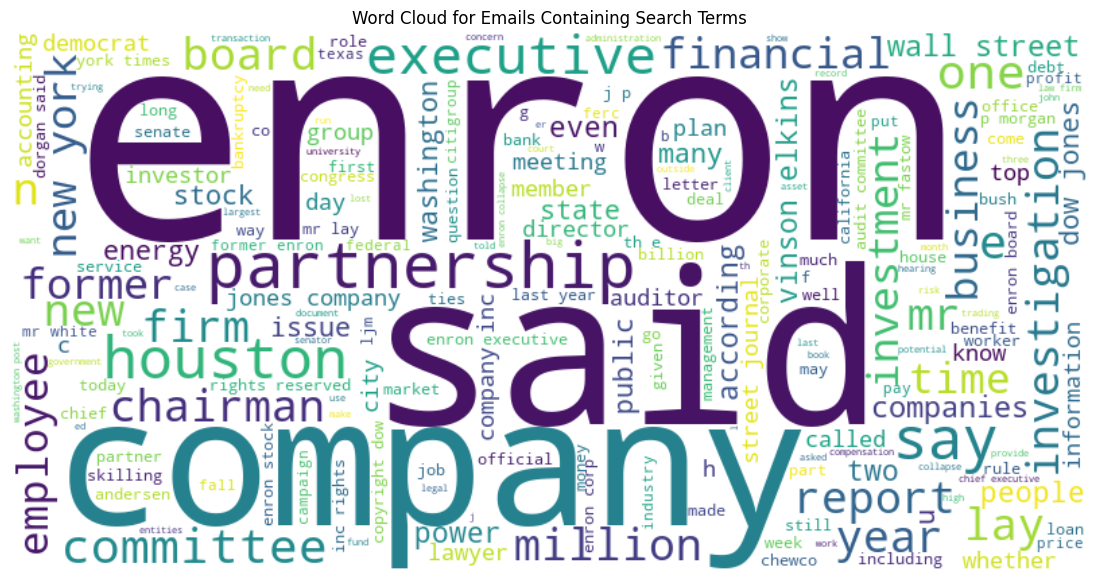

In [29]:
# Import necessary libraries
import pandas as pd
import os
from rich.console import Console
from rich.table import Table
from rich import box
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print('1. Set up the console for rich printing')
console = Console()

print('2. Define file path')
csv_file_path = os.path.join(os.getcwd(), '01-data/FD_01_enron.csv')

print('3. Read CSV file into DataFrame')
df = pd.read_csv(csv_file_path)

print('4.1 Define search terms')
search_terms = ['sell enron stock']

print('4.2 Use string operations to filter rows')
filtered_emails = df[df['clean_content'].str.contains('|'.join(search_terms), na=False)]

print('5. Create a rich table for filtered emails')
email_table = Table(show_header=True, header_style="bold magenta", box=box.ROUNDED)
email_table.add_column("Message-ID", style="dim", width=100,overflow="fold")
email_table.add_column("From", width=100)
email_table.add_column("To", width=100,overflow="fold")
email_table.add_column("Date", style="dim", width=100)
email_table.add_column("Content", overflow="fold", width=100)  
for _, row in filtered_emails.head().iterrows():
    email_table.add_row(
        str(row['Message-ID']),
        row['From'],
        row['To'],
        str(row['Date']),
        row['clean_content'][:200] + "..." 
    )

console.print("Filtered Emails (first few rows):", style="bold underline")
console.print(email_table)

df['flag'] = df['clean_content'].str.contains('|'.join(search_terms), na=False).astype(int)

print('6. display and word cloud generation as intended')
console.print("Flagged Emails Count:", style="bold underline")
flag_table = Table(show_header=True, header_style="bold magenta")
flag_table.add_column("Flag", style="dim")
flag_table.add_column("Count", justify="right")
flag_counts = df['flag'].value_counts().items()
for flag, count in flag_counts:
    flag_table.add_row(str(flag), str(count))
console.print(flag_table)

print('7. Function to print unique senders from filtered emails using rich')
def print_unique_senders(emails_df):
    unique_senders = emails_df['From'].dropna().unique()
    console.print(f"Unique Senders in Filtered Emails ({len(unique_senders)}):", style="bold underline")
    for sender in unique_senders:
        console.print(f"- {sender}")

print('8. Print unique senders from emails that match the search terms')
print_unique_senders(filtered_emails)

print('9. Combine the content of the filtered emails into one large text string for the word cloud')
text_for_wordcloud = " ".join(email for email in filtered_emails['clean_content'].dropna())

print('10. Generate a word cloud from the combined text of filtered emails')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

print('11. Display the generated word cloud using matplotlib')
plt.figure(figsize=(15, 7))  # Size of the figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Emails Containing Search Terms')
plt.show()
